# Regression Model 

### Introduction

In this notebook, we aim to develop a predictive model leveraging the California housing dataset, focusing specifically on predicting housing prices using the XGBoost regression algorithm. Housing prices are influenced by a multitude of factors, including geographical location, socio-economic status, and property characteristics. By utilising this dataset, we can gain insights into how these variables interact and contribute to housing price determinations.

The California housing dataset includes several key features that provide valuable information for our analysis:

- **Longitude and Latitude**: These geographical coordinates help us understand the location of the houses, which is crucial since housing prices can vary significantly across different areas.
- **Housing Median Age**: This feature represents the median age of the houses in a given district, indicating the development stage of the neighbourhood.
- **Total Rooms and Total Bedrooms**: These attributes reflect the size of the properties, which can greatly influence their market value.
- **Population and Households**: The demographic data sheds light on the density and living conditions in the area, both of which can impact housing demand and pricing.
- **Median Income**: This economic indicator is particularly important, as it directly correlates with what residents can afford to pay for housing.
- **Median House Value**: This is our target variable, representing the value of the house we aim to predict based on the aforementioned features.
- **Ocean Proximity**: This categorical feature indicates the proximity of the house to the ocean, which often affects property values in coastal areas.

The structured approach we will take in this notebook includes several key steps:

- **Data Cleaning**: We will ensure the dataset is clean and free from inconsistencies or missing values that could affect our model's performance.
- **Data Analysis**: An exploratory analysis will help us understand the underlying patterns and distributions within the dataset, as well as relationships between different features.
- **Training the Model**: We will split the data into training and testing sets to validate our model effectively.
- **XGBoost Regressor**: This powerful machine learning algorithm will be employed to build our regression model, known for its high performance and accuracy in prediction tasks.
- **Evaluation**: Finally, we will assess the model's performance using relevant metrics to determine its effectiveness in predicting housing prices.

Through this comprehensive analysis, we aim not only to build a robust predictive model but also to uncover insights into the dynamics of the California housing market.


### Importing Dependancies 

In [93]:
#importing modules I would like to use for my analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [94]:
from xgboost import XGBRegressor

### Loading the dataset

In [114]:
file_path = 'housing.csv'  # File in the same directory
df = pd.read_csv(file_path)
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


### Looking into the Data

In [96]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

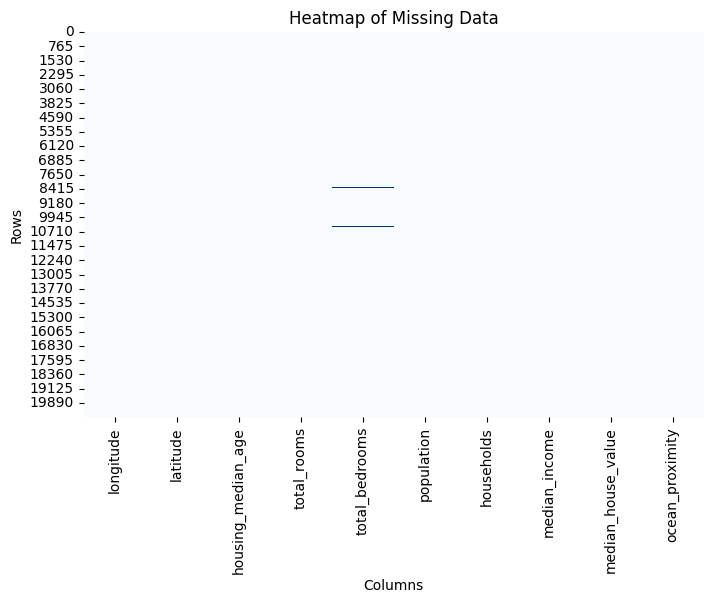

In [ ]:
# Plot the heatmap of missing data
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="Blues") 
plt.ylabel("Rows")
plt.title("Heatmap of Missing Data")
plt.show()

The visual data indicates that there are not many null values relative to the total amount of data available in the columns. This minimal presence of nulls suggests that dropping the rows containing these values is an acceptable approach. 

If the missing data had been more impactful or prevalent, I would have considered either:

- Dropping entire columns with excessive null values.
- Finding the mean or average values to fill in the missing data points.

This strategy ensures that we maintain the integrity of our dataset while minimising the potential impact on our analysis and model performance.


In [116]:
# drop the missing data
housing_dataset = df.dropna()

In [117]:
housing_dataset.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

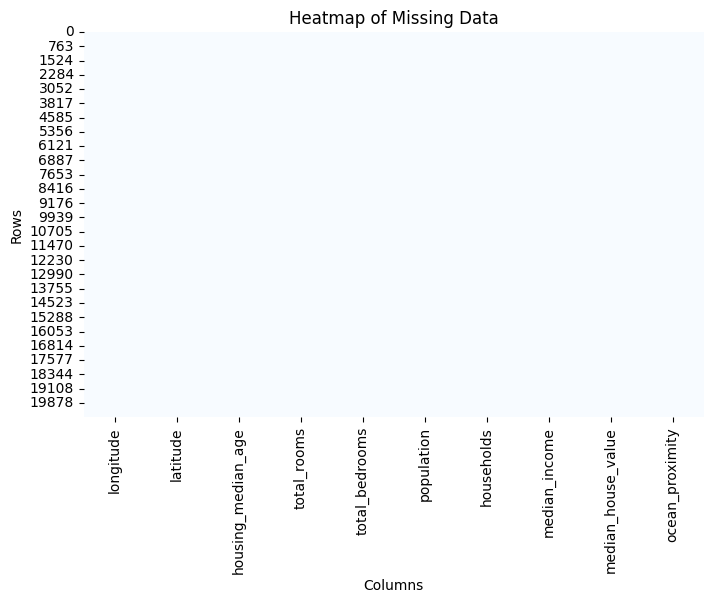

In [143]:
# Plot the heatmap of missing data
plt.figure(figsize=(8, 5))
sns.heatmap(housing_dataset.isnull(), cbar=False, cmap="Blues")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.title("Heatmap of Missing Data")
plt.show()

In [101]:
housing_dataset.shape

(20433, 10)

In [119]:
# Stats for the selected columns in the DataFrame
housing_dataset[['households', 'housing_median_age', 'total_rooms', 'population', 'median_income', 'median_house_value']].describe()

,households,housing_median_age,total_rooms,population,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,499.433465,28.633094,2636.504233,1424.946949,3.871162,206864.413155
std,382.299226,12.591805,2185.269567,1133.208490,1.899291,115435.667099
min,1.000000,1.000000,2.000000,3.000000,0.499900,14999.000000
25%,280.000000,18.000000,1450.000000,787.000000,2.563700,119500.000000
50%,409.000000,29.000000,2127.000000,1166.000000,3.536500,179700.000000
75%,604.000000,37.000000,3143.000000,1722.000000,4.744000,264700.000000
max,6082.000000,52.000000,39320.000000,35682.000000,15.000100,500001.000000


## Exploratory Data Analysis

In [121]:
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


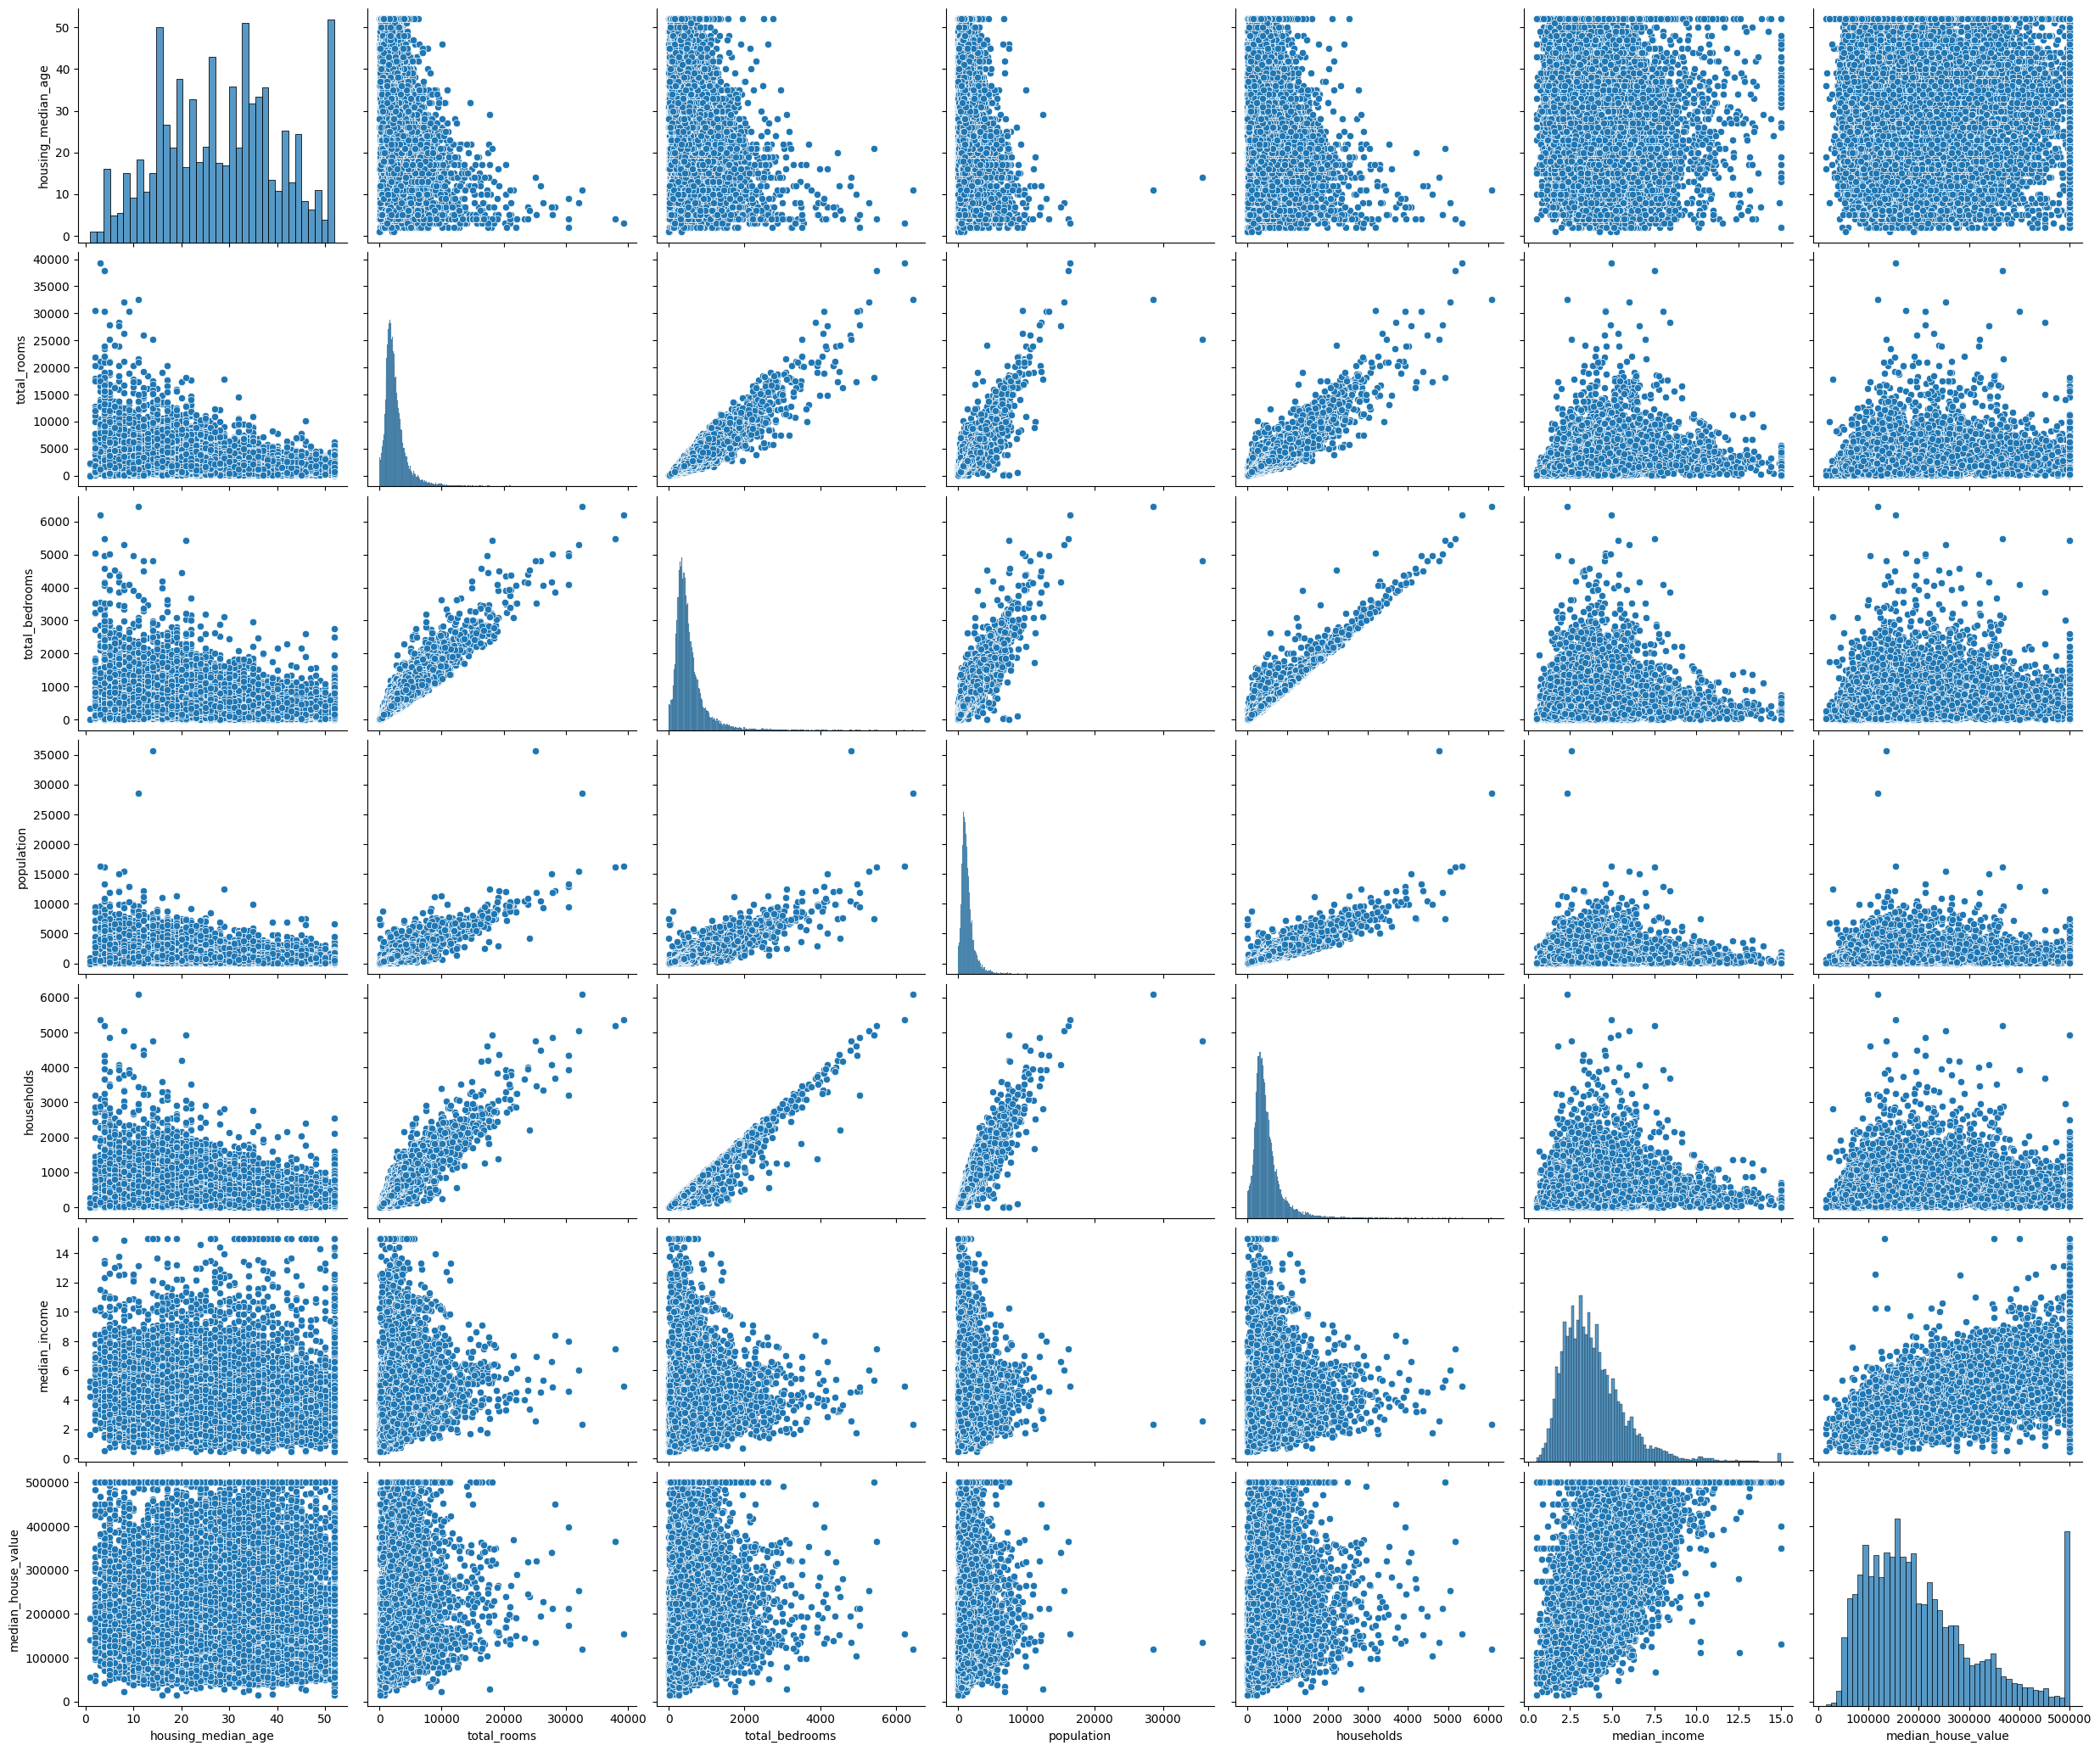

In [123]:
# Replace these with columns you actually want to drop
housing_data_cleaned = housing_dataset.drop(['longitude', 'latitude', 'ocean_proximity'], axis=1)

# Create the pair plot with a specific height and aspect ratio for each subplot
sns.pairplot(data=housing_data_cleaned, height=3, aspect=1.2)

# Display the plot
plt.show()

In [124]:
housing_dataset.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


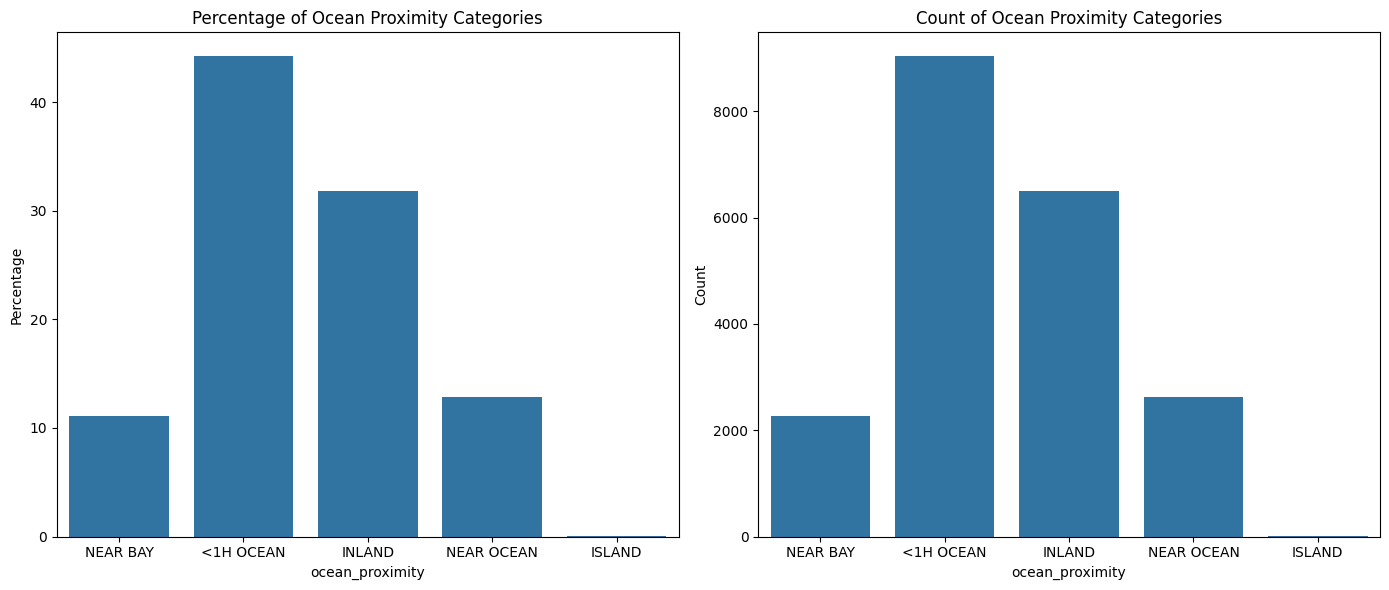

In [127]:
# Create a 1x2 grid of plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Count plot for ocean_proximity with percentages
sns.countplot(data=housing_dataset, x="ocean_proximity", ax=axs[0], stat="percent")
axs[0].set_title('Percentage of Ocean Proximity Categories')
axs[0].set_ylabel('Percentage')

# Count plot for ocean_proximity with raw counts
sns.countplot(data=housing_dataset, x="ocean_proximity", ax=axs[1])
axs[1].set_title('Count of Ocean Proximity Categories')
axs[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

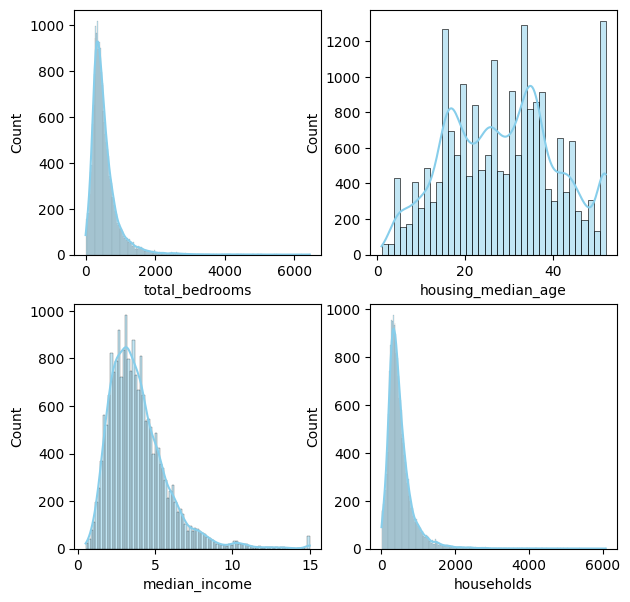

In [105]:


fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=housing_dataset, x="total_bedrooms", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=housing_dataset, x="housing_median_age", kde=True, color="skyblue", ax=axs[0, 1])
sns.histplot(data=housing_dataset, x="median_income", kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=housing_dataset, x="households", kde=True, color="skyblue", ax=axs[1, 1])

plt.show()

<Axes: xlabel='households'>

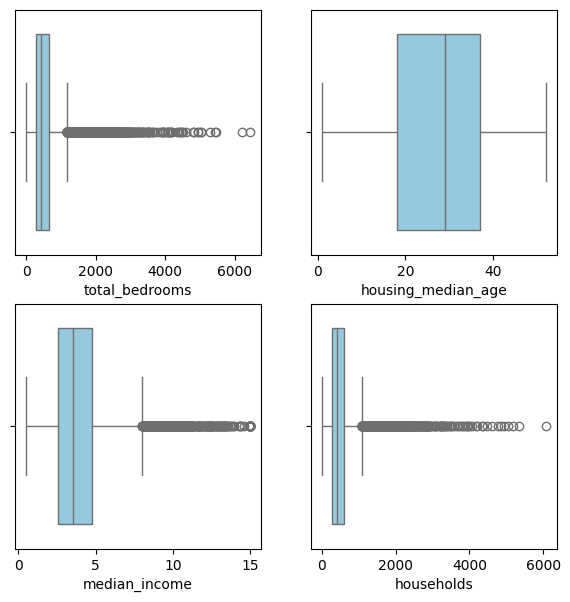

In [72]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.boxplot(data=housing_dataset, x="total_bedrooms", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=housing_dataset, x="housing_median_age", color="skyblue", ax=axs[0, 1])
sns.boxplot(data=housing_dataset, x="median_income", color="skyblue", ax=axs[1, 0])
sns.boxplot(data=housing_dataset, x="households", color="skyblue", ax=axs[1, 1])

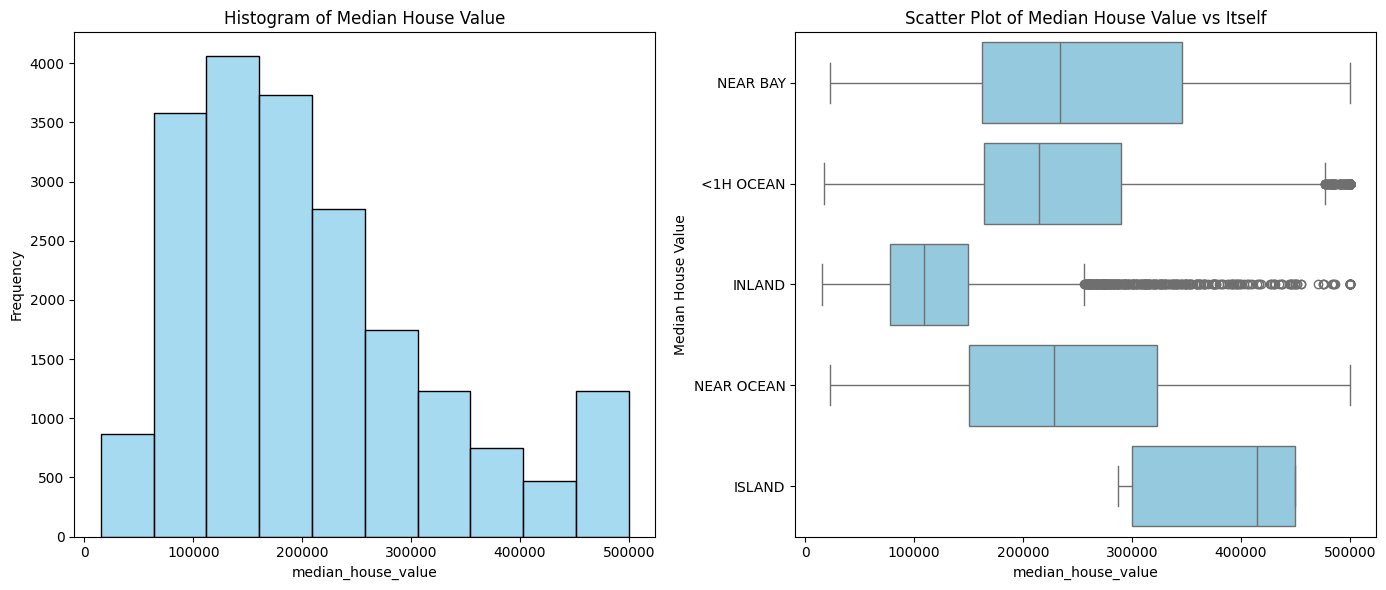

In [140]:
# Create a 1x2 grid of plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for median_house_value
sns.histplot(data=housing_dataset, x="median_house_value", color="skyblue", ax=axs[0], bins=10)
axs[0].set_title('Histogram of Median House Value')
axs[0].set_ylabel('Frequency')

# Scatter plot for median_house_value vs itself (placeholder)
sns.boxplot(data=housing_dataset, x='median_house_value', y='ocean_proximity',  ax=axs[1], color="skyblue")
axs[1].set_title('Scatter Plot of Median House Value vs Itself')
axs[1].set_ylabel('Median House Value')

# Adjust layout
plt.tight_layout()
plt.show()


## Understanding the correlation between the various features 

1. Positive Correlation
2. Negative Correlation 

In [14]:
housing_dataset.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [16]:
#removing non numberical columns so I can look into correlation 
housing_corr = housing_dataset.select_dtypes(include=[np.float64])
housing_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [17]:
correlation = housing_corr.corr()

<Axes: >

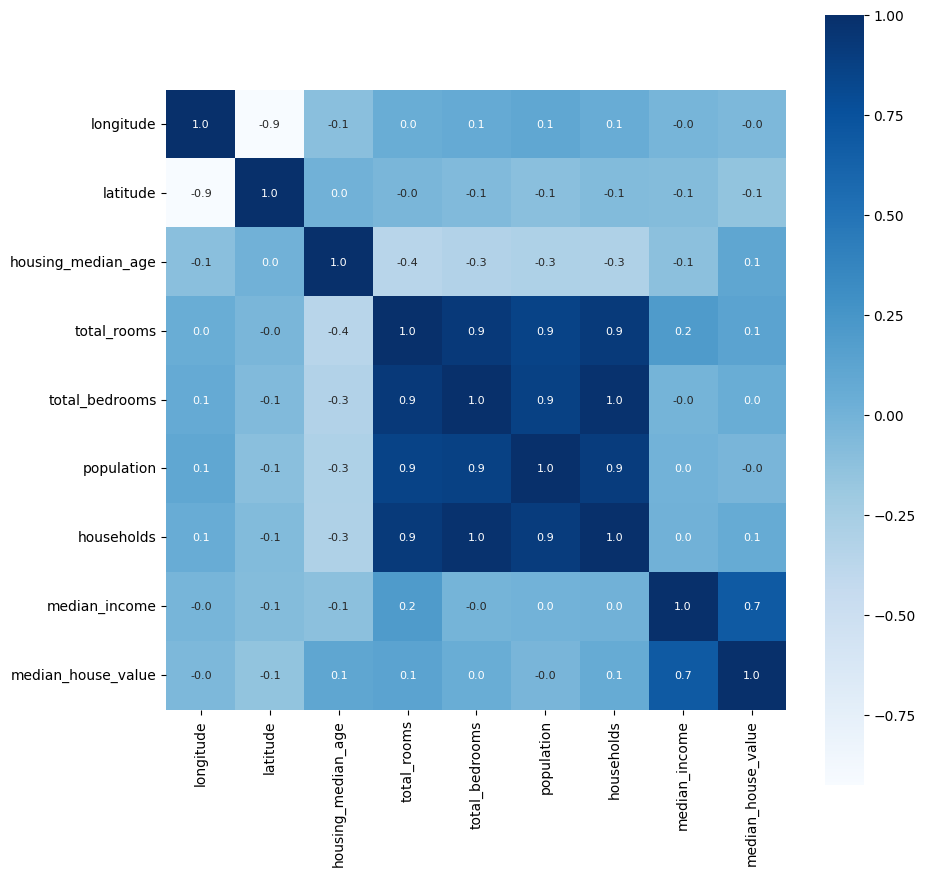

In [19]:
#visualiing correlation in a heatmap 
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

incorperating the ocean proximity into the df 

In [25]:
# Converting categorical for ocean proximity values to numeric values 
housing_dataset = pd.get_dummies(housing_dataset, columns= ['ocean_proximity'])

In [26]:
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [29]:
# Convert all boolean columns to 1 and 0 so it can be used in the ml model 
housing_dataset = housing_dataset.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [30]:
housing_dataset.dtypes

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_<1H OCEAN       int64
ocean_proximity_INLAND          int64
ocean_proximity_ISLAND          int64
ocean_proximity_NEAR BAY        int64
ocean_proximity_NEAR OCEAN      int64
dtype: object

In [56]:
#recreating a corr graph 
correlation_1 = housing_dataset.corr()

<Axes: >

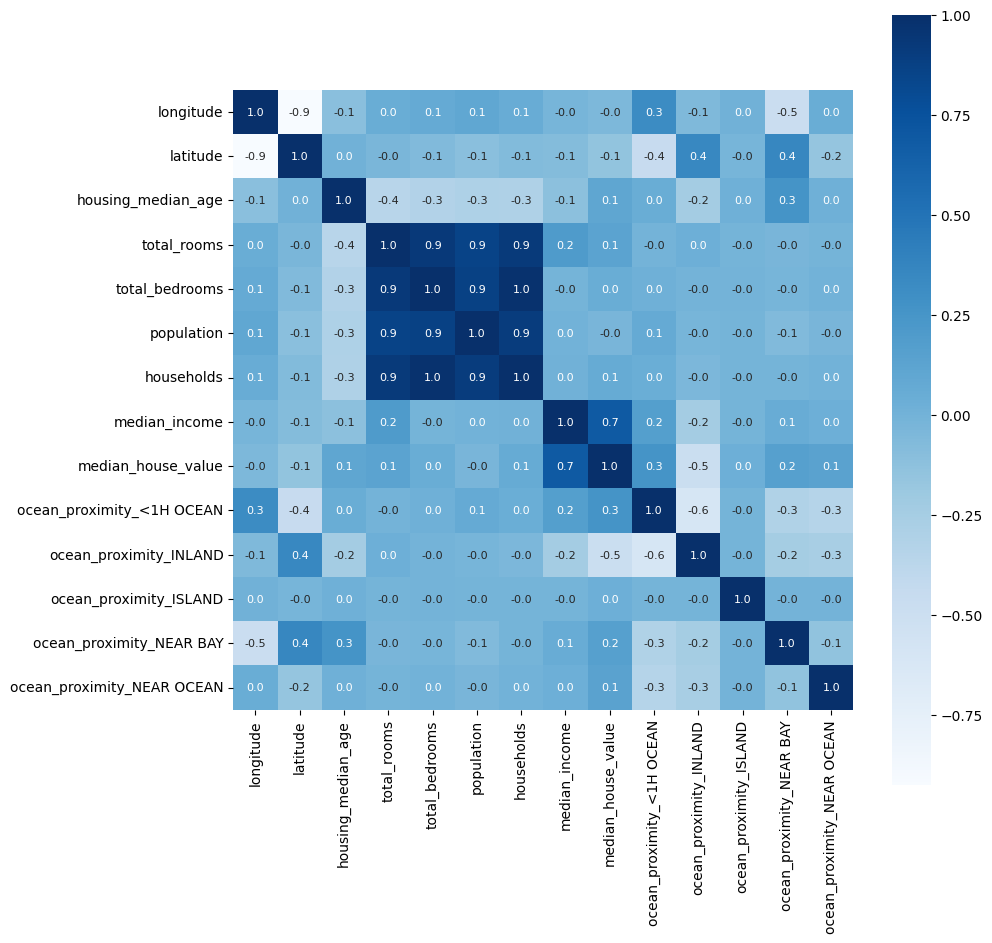

In [57]:
#visualiing correlation in a heatmap 
plt.figure(figsize=(10,10))
sns.heatmap(correlation_1, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

splitting the data and target 

In [34]:
#predict the median house value and train on everything else
X = housing_dataset.drop(['median_house_value'], axis = 1)
Y = housing_dataset['median_house_value']

In [63]:
# print(X)
# print(Y)

splitting the data into Training data and Test data 

In [33]:
#going to train on 80% of the data and test on 20% of the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=2)


In [35]:
print(X.shape, X_train.shape, X_test.shape)

(20433, 13) (16346, 13) (4087, 13)


Model Training 

XGBoost Regressor

In [36]:
#loading the model 
model = XGBRegressor()

In [37]:
#Identifying whhat special charecters are affecting the model 
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [38]:
#to remove the '<' and the spaces in the column names 
X_train.columns = X_train.columns.str.replace('<', '', regex=True)
X_train.columns = X_train.columns.str.replace(' ', '_', regex=True)

In [39]:
#training the model with x train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

evaluating the model 

prediction on the training data 

In [40]:
#accuracy for prediction on training data 
training_data_prediction= model.predict(X_train)

In [41]:
training_data_prediction

array([ 79950.94, 427620.53, 361620.25, ..., 136979.25, 188609.81,
       136163.66], dtype=float32)

In [42]:
#r squared error - you want the number to be close to zero as much as possible 
score_1 = metrics.r2_score(Y_train, training_data_prediction)


#mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)


print('R squared error :', score_1)
print('Mean absolute error:', score_2)

R squared error : 0.9390458342845345
Mean absolute error: 20107.890944745657


visualising the prices 

<function matplotlib.pyplot.show(close=None, block=None)>

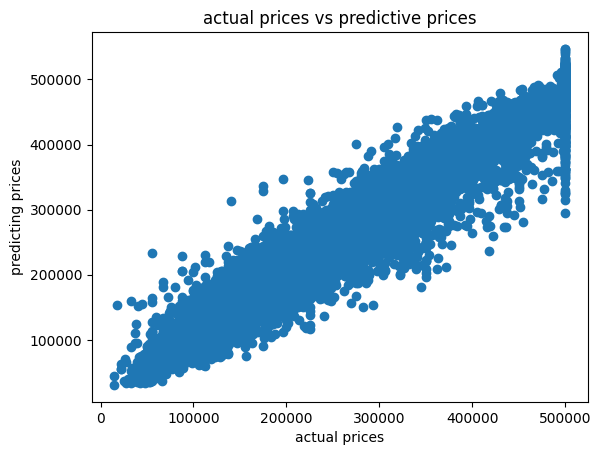

In [43]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('actual prices')
plt.ylabel('predicting prices')
plt.title('actual prices vs predictive prices')
plt.show

### Model Performance Evaluation

After evaluating the model's performance, we obtained the following metrics:

- **Mean Absolute Error (MAE)**: $20,107.89
- **R-squared (R²)**: 0.9390

#### Interpretation:
- The **MAE** indicates that, on average, our model's predictions deviate from the actual house prices by approximately $20,107.89. Given that the maximum house value in our dataset is $500,001, this represents an approximate error of 4%. This level of accuracy is generally acceptable in real estate predictions, where values can fluctuate significantly.

- The **R-squared** value of 0.9390 suggests that our model explains about 93.9% of the variability in the house prices. This is a strong indication that our model fits the data well.



prediction on test data 

In [46]:
#to remove the '<' and the spaces in the column names 
X_test.columns = X_test.columns.str.replace('<', '', regex=True)
X_test.columns = X_test.columns.str.replace(' ', '_', regex=True)

In [47]:
#accuracy for prediction on training data 
test_data_prediction= model.predict(X_test)

In [48]:
#r squared error - you want the number to be close to zero as much as possible 
score_1 = metrics.r2_score(Y_test, test_data_prediction)


#mean absolute error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [49]:
print('R squared error :', score_1)
print('Mean absolute error:', score_2)

R squared error : 0.8233248942600621
Mean absolute error: 31644.37365331386


<function matplotlib.pyplot.show(close=None, block=None)>

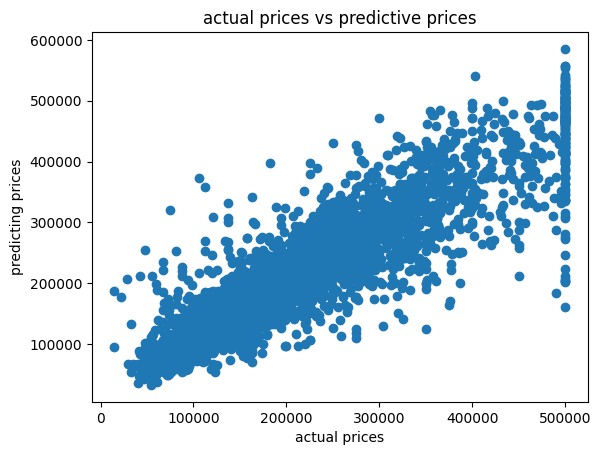

In [50]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('actual prices')
plt.ylabel('predicting prices')
plt.title('actual prices vs predictive prices')
plt.show

### Model Performance on Test Data

After evaluating our model on the test dataset, we obtained the following metrics:

- **R-squared (R²)**: 0.8233
- **Mean Absolute Error (MAE)**: $31,644.37

#### Interpretation:
- The **R-squared value of 0.8233** indicates that approximately **82.33%** of the variability in house prices can be explained by the model. While this is a solid performance, it is notably lower than the R² of **0.939** observed on the training data. This discrepancy suggests that the model may be exhibiting some overfitting, capturing noise in the training data that does not generalise well to unseen data.

- The **Mean Absolute Error (MAE) of $31,644.37** means that, on average, the model's predictions deviate from the actual house prices by about **$31,644.37**. Given the context of house prices, this level of error can be significant, particularly when considering properties in higher value ranges. The MAE represents approximately **6.33%** of the maximum house value in our dataset (assuming a maximum value of $500,001). 

### Summary
Overall, while the model demonstrates a reasonable fit on the test data, the relatively high MAE and lower R² indicate potential areas for improvement. Future steps could include exploring feature engineering, trying different model algorithms, or utilising cross-validation techniques to enhance generalisation and predictive accuracy. Further analysis of residuals may also provide insights into systematic errors in the predictions.
